In [6]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# import seaborn as sns

dataset = pd.read_csv("../data/logfile-storage-v5.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,datacenter_storage_energy,storage_id,system,storage_capacity,capacity_used,active_duration,idle_intervals,duration,total_energy_active,total_energy_idle,average_rotation_latency,average_seek_Time,max_internal_data_transfer_rate,is_active,idle_power,active_power,files,Unnamed: 19
0,3,Datacenter_1,4.099681e+06,0,storage,900000.0,899584.0,4635.372761,1.0000003378537212:,9447.595287,26885.162012,3.000001,0.003,0.004,198.0,False,3.0,5.8,"55596,3072,15.524809784082704:450990,1024,5.18...",NaN
1,3,Datacenter_1,4.099681e+06,1,storage,900000.0,899584.0,4552.153376,1.0000000057506384:,9447.595287,26402.489581,3.000000,0.003,0.004,198.0,False,3.0,5.8,"1002363,1024,5.178738666087011:287333,512,2.59...",NaN
2,3,Datacenter_1,4.099681e+06,2,storage,900000.0,899584.0,4712.463046,1.0000000137015315:,9447.595287,27332.285668,3.000000,0.003,0.004,198.0,False,3.0,5.8,"3-6852,8192,41.38862101694565:24-285602,512,2....",NaN
3,3,Datacenter_1,4.099681e+06,3,storage,900000.0,899584.0,4924.857340,1.0000000205963306:,9447.595287,28564.172570,3.000000,0.003,0.004,198.0,False,3.0,5.8,"303602,3584,18.10363760760568:1-591519,3072,15...",NaN
4,3,Datacenter_1,4.099681e+06,4,storage,900000.0,899584.0,4813.303893,1.000000024323157:,9447.595287,27917.162579,3.000000,0.003,0.004,198.0,False,3.0,5.8,"2-878359,1024,5.1852412125875285:2-1002249,102...",NaN


3519.0 files at datacenter 'Datacenter_1'.


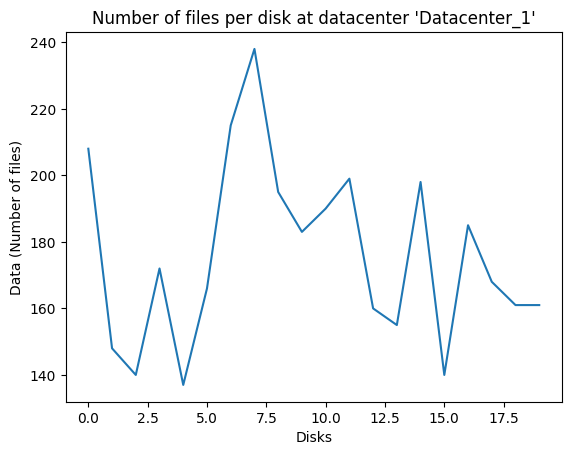

8248.0 files at datacenter 'Datacenter_2'.


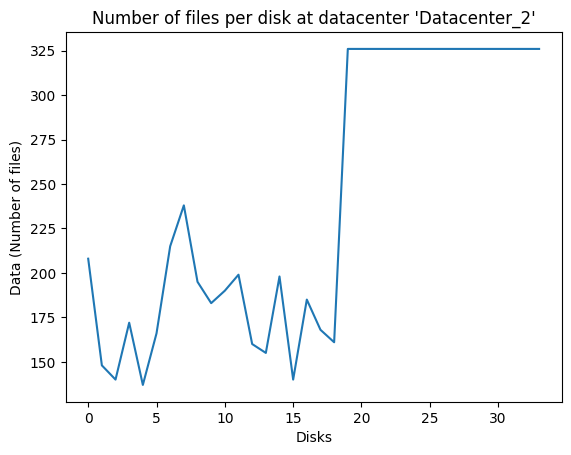

12808.0 files at datacenter 'Datacenter_3'.


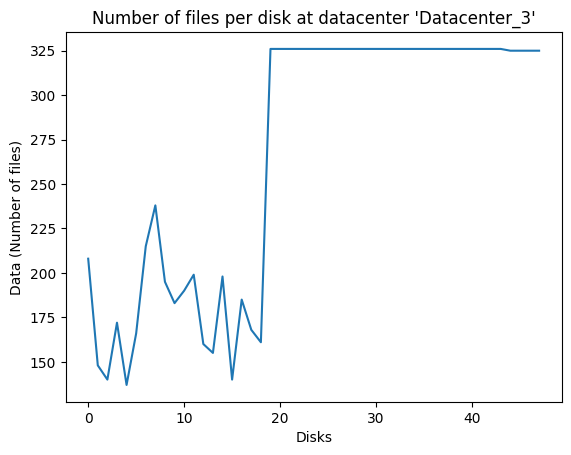

16284.0 files at datacenter 'Datacenter_4'.


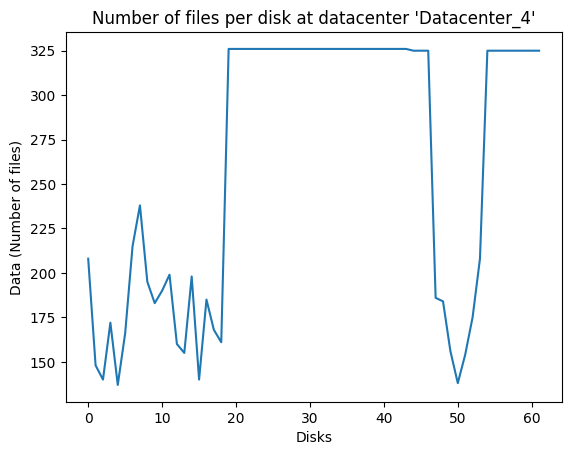

The cloud provider has 40859.0 files stored.


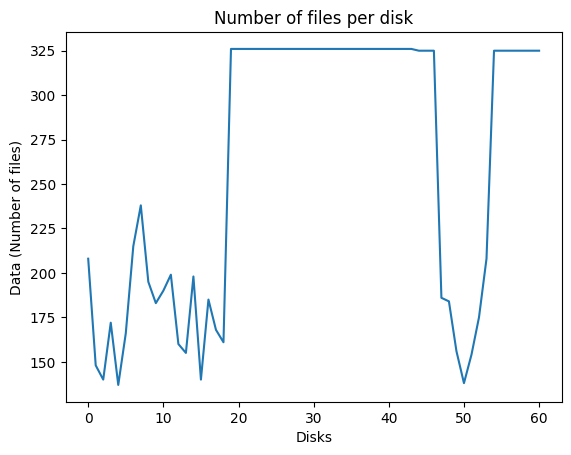

In [7]:
labels = np.unique(dataset['datacenter_name'])
files_per_datacenter = np.array([])
files_per_host = np.array([])

for i in range(len(labels)):
    files_per_datacenter_per_host = np.array([])
    
    for index, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        if pd.notna(sample['files']):
            files_per_host = np.append(files_per_host, len(sample['files'].split(":")) - 1)
            files_per_datacenter_per_host = np.append(files_per_host, len(sample['files'].split(":")) - 1)        
    files_per_datacenter = np.append(files_per_datacenter, sum(files_per_datacenter_per_host))
    
    print(f"{sum(files_per_datacenter_per_host)} files at datacenter '{labels[i]}'.")
    plt.plot(np.arange(len(files_per_datacenter_per_host)), files_per_datacenter_per_host, label="Files per host")
    plt.xlabel("Disks")
    plt.ylabel("Data (Number of files)")
    plt.title(f"Number of files per disk at datacenter '{labels[i]}'")
    # plt.legend()
    plt.savefig(f"../figs/storage/storage_placement/{sample['datacenter_name'].lower()}_storage_placement.eps", format="eps")
    plt.show()

print(f"The cloud provider has {sum(files_per_datacenter)} files stored.")
plt.plot(np.arange(len(files_per_host)), files_per_host, label="Files per disk")
plt.xlabel("Disks")
plt.ylabel("Data (Number of files)")
plt.title("Number of files per disk")
# plt.legend()
plt.savefig(f"../figs/storage/storage_placement/cloud_provider_storage_placement.eps", format="eps")
plt.show()